In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def sigmoid(x):
  v=1/(1+np.exp(-x))
  print(v)
  return(v)

In [ ]:
X=np.arange(-10,11)
y=sigmoid(X)

In [ ]:
X

In [ ]:
y

In [ ]:
plt.plot(X,y)
plt.show()

In [ ]:
df=pd.read_csv("diabetes.csv")

In [ ]:
df.head()

In [ ]:
df["Outcome"].value_counts()

In [ ]:
#train test split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(xtrain,ytrain)

In [ ]:
log.score(xtest,ytest)

In [ ]:
print(log.coef_)

In [ ]:
print(log.intercept_)

In [ ]:
y_pred=log.predict(xtest)
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
tn,fp,fn,tp=confusion_matrix(ytest,y_pred).ravel()

In [ ]:
print(tp,fn)
print(fp,tn)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
accuracy_score(ytest,y_pred)

0.7835497835497836

In [ ]:
precision_score(ytest,y_pred)

0.7777777777777778

In [ ]:
recall_score(ytest,y_pred)

0.5764705882352941

In [ ]:
f1_score(ytest,y_pred)

0.6621621621621621

In [ ]:
#ROC curves are very hlp with understanding the balance between true-positive rate and false positiverate
from sklearn.metrics import roc_curve

In [ ]:
fpr,tpr,threshold=roc_curve(ytest,y_pred)

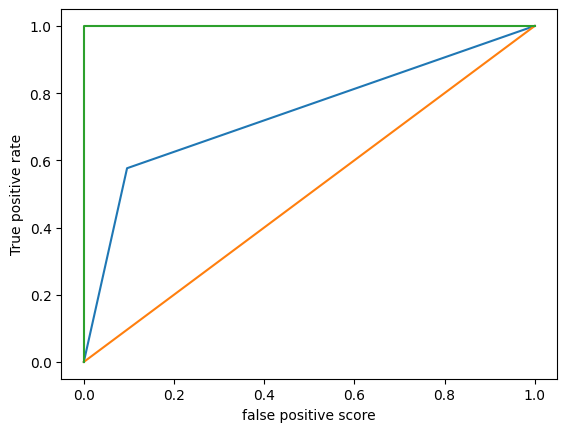

In [ ]:
#plotting the ROC curve
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],label='random')
plt.plot([0,0,1],[0,1,1],label='perfect')
plt.xlabel('false positive score')
plt.ylabel('True positive rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
auc=roc_auc_score(ytest,y_pred)

In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

